<a href="https://colab.research.google.com/github/mlstatmonkey/python_ml/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [45]:
df.head()

longitude  latitude  ...  median_income  median_house_value
0    -114.31     34.19  ...         1.4936             66900.0
1    -114.47     34.40  ...         1.8200             80100.0
2    -114.56     33.69  ...         1.6509             85700.0
3    -114.57     33.64  ...         3.1917             73400.0
4    -114.57     33.57  ...         1.9250             65500.0

[5 rows x 9 columns]

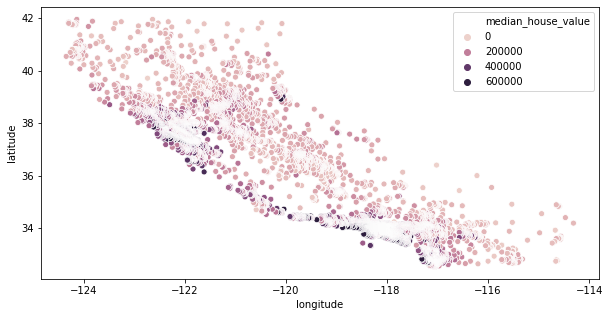

In [46]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='longitude',y='latitude', data=df, hue='median_house_value')

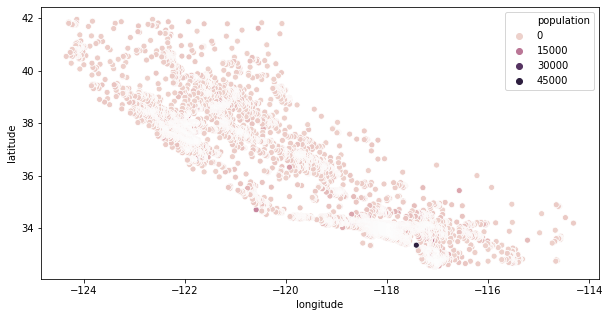

In [47]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='longitude',y='latitude', data=df, hue='population')

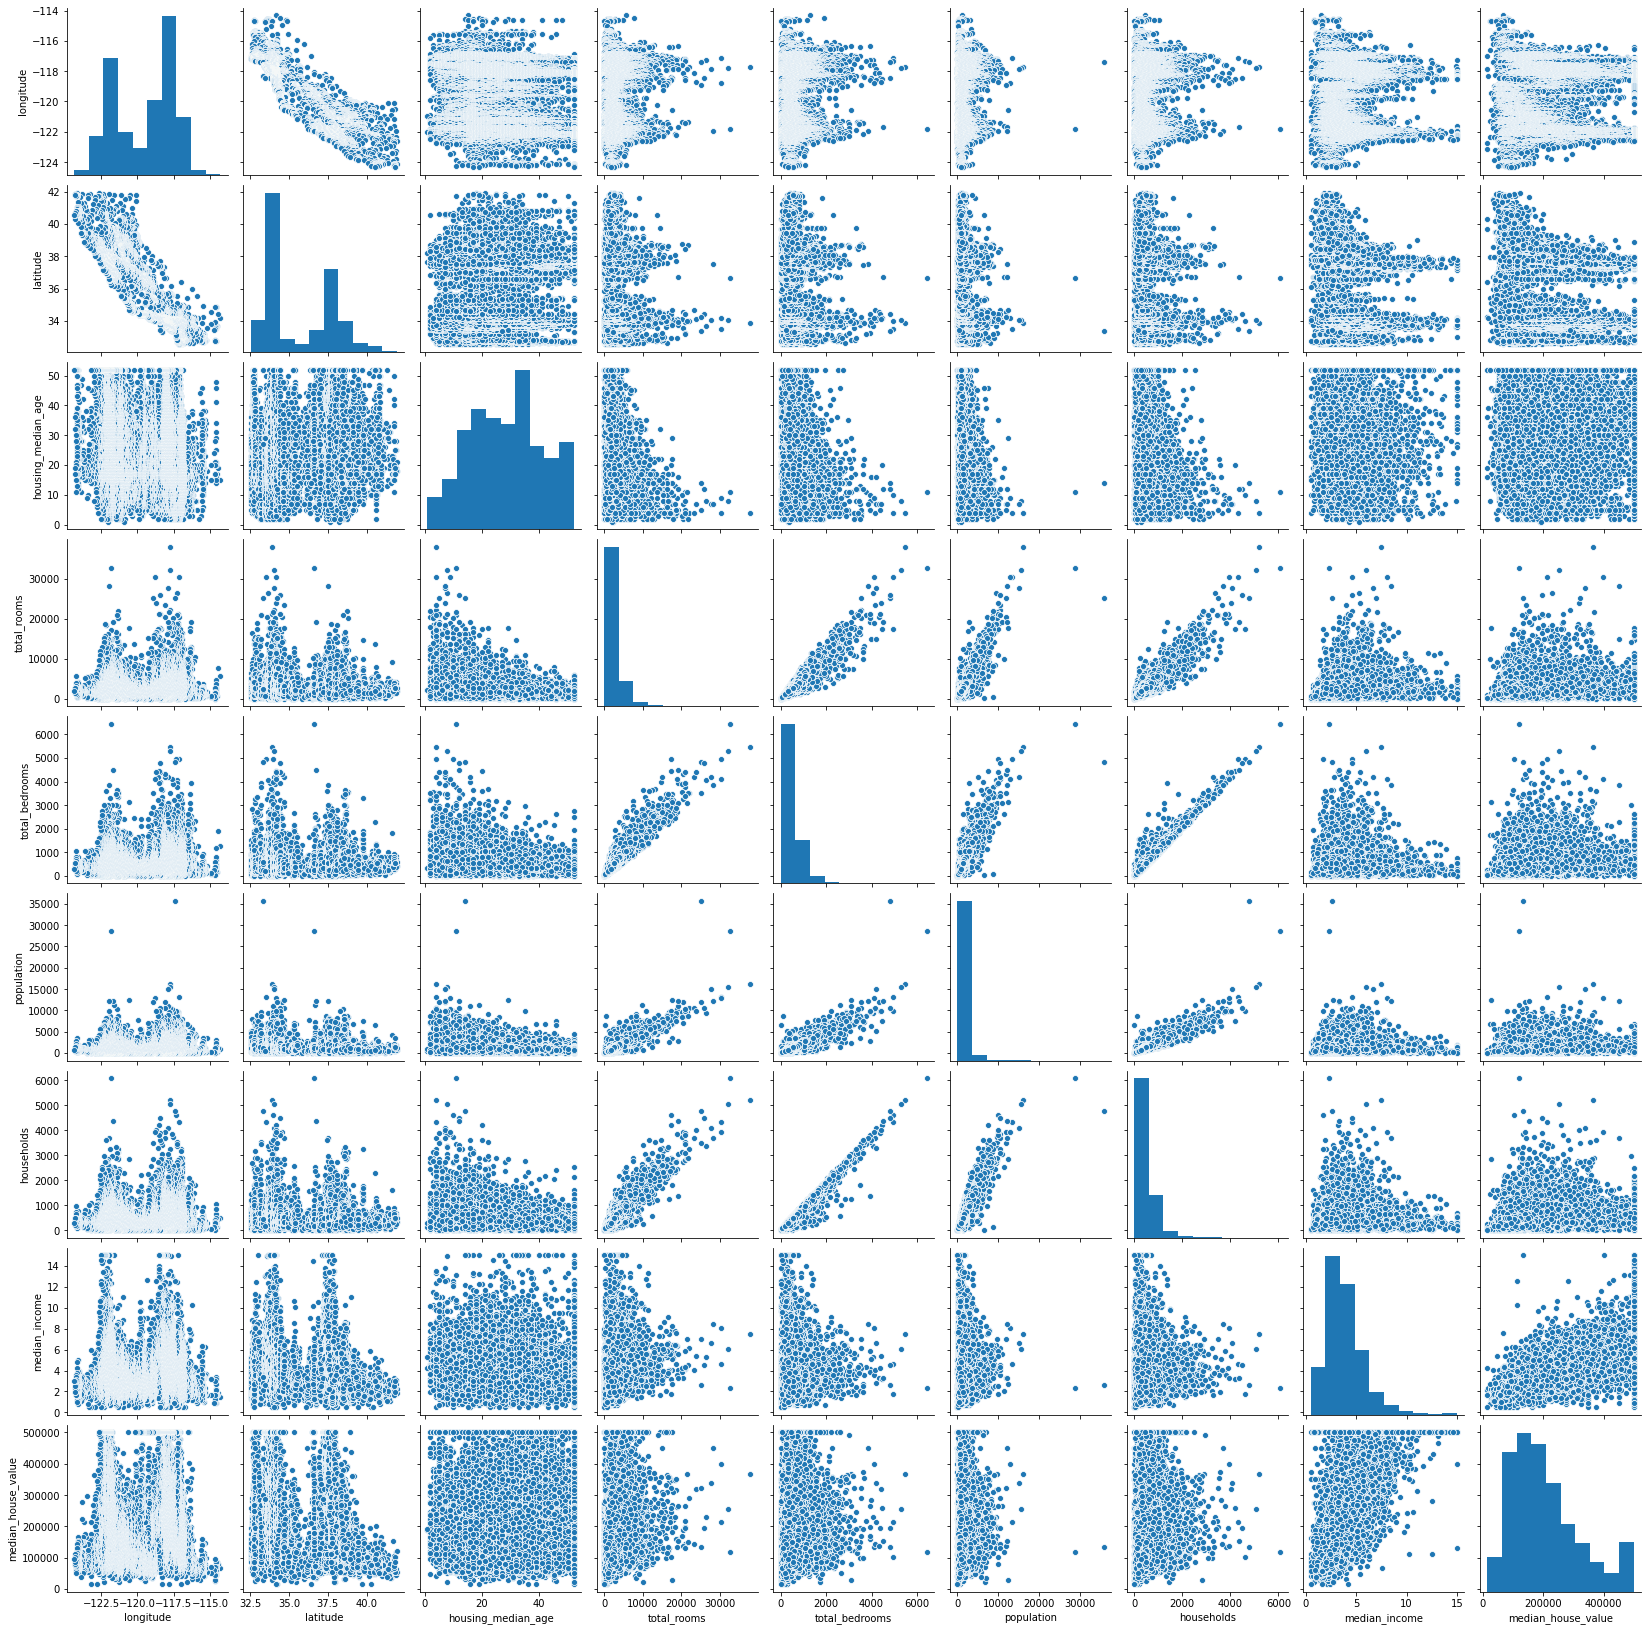

In [48]:
sns.pairplot(df)

In [49]:
df.corr()['median_house_value']

longitude            -0.044982
latitude             -0.144917
housing_median_age    0.106758
total_rooms           0.130991
total_bedrooms        0.045783
population           -0.027850
households            0.061031
median_income         0.691871
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X=df.drop(columns='median_house_value')
y=df['median_house_value']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()

In [103]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
mean_squared_error(lm.predict(X_train), y_train)/(len(X_train)-lm.rank_-1)*len(X_train)

4852415701.224408

In [114]:
lm.coef_

array([-4.30873665e+04, -4.29700365e+04,  1.11722517e+03, -8.94455508e+00,
        1.10627912e+02, -3.29161482e+01,  4.04002464e+01,  4.02959459e+04])

In [0]:
predict=lm.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error

In [117]:
mean_squared_error(y_test, predict)

4802776732.81492

In [118]:
np.sqrt(mean_squared_error(y_test, predict))

69302.06874845021

In [119]:
df.median_house_value.mean()

207300.91235294117

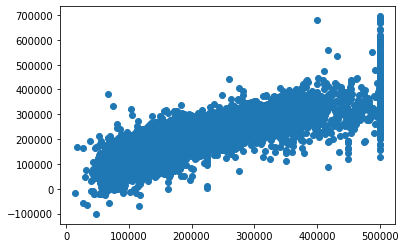

In [120]:
plt.scatter(y_test, predict)

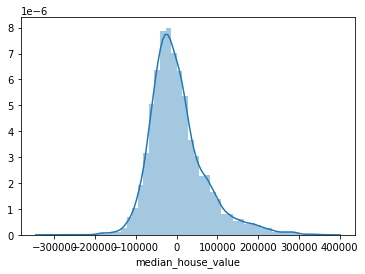

In [121]:
sns.distplot(y_test-predict)

Using statmodels for regression

In [0]:
import statsmodels.api as sm

In [0]:
# Create a constant
# df2=sm.add_constant(df)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [0]:
# Fit the model using OLS
lm2 = sm.OLS(y_train, X_train)
result = lm2.fit()

In [125]:
# Show result
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     2481.
Date:                Sat, 30 May 2020   Prob (F-statistic):               0.00
Time:                        17:44:17   Log-Likelihood:            -1.4317e+05
No. Observations:               11390   AIC:                         2.864e+05
Df Residuals:                   11381   BIC:                         2.864e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.612e+06   8.47

Warning in the summary suggest the multicolinearity in the data. Looking at the pairplot, there isn't anything that can fit the data correctly. We will assume the model works well in this case.

In [126]:
# Check the coefficient between sklearn vs statsmodel
print(lm.intercept_)
print(lm.coef_)

-3611846.680909306
[-4.30873665e+04 -4.29700365e+04  1.11722517e+03 -8.94455508e+00
  1.10627912e+02 -3.29161482e+01  4.04002464e+01  4.02959459e+04]


In [127]:
print(result.params)

const                -3.611847e+06
longitude            -4.308737e+04
latitude             -4.297004e+04
housing_median_age    1.117225e+03
total_rooms          -8.944555e+00
total_bedrooms        1.106279e+02
population           -3.291615e+01
households            4.040025e+01
median_income         4.029595e+04
dtype: float64


In [128]:
result.mse_resid

4852415701.224408

In [135]:
# Compare MSE between sklearn and statsmodel. Adjusted for df for residual
mean_squared_error(lm.predict(X_train.drop(columns='const')), y_train)/(len(X_train)-lm.rank_-1)*len(X_train)

4852415701.224408

In [0]:
predict2= result.predict(X_test)

In [145]:
print(mean_squared_error(y_test, predict2))
print(mean_squared_error(y_test, predict))

4802776732.814902
4802776732.81492


In [175]:
print(sum((y_test-predict2)**2)/len(y_test))
print(sum((y_test-predict)**2)/len(y_test))

4802776732.814911
4802776732.814923


In [179]:
print(sum(abs(predict-predict2)))
print(min(abs(predict-predict2)))
print(max(abs(predict-predict2)))

0.00019562036686693318
0.0
5.218898877501488e-07


The difference is due to precision error

In [173]:
# Consider both are the same calculation, but the difference is due to the precision
print((sum((y_test-predict)**2)-sum((y_test-predict2)**2))/len(y_test))
print(sum((y_test-predict)**2)/len(X_test)-sum((y_test-predict2)**2)/len(X_test))

1.1837121212121212e-05
1.239776611328125e-05
